In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [2]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [3]:
udplag_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\UDPLag_resample_4000.csv')
udplag_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2.209517,-0.327036,-0.309612,-0.339661,0.650963,-0.010439,2.084232,2.355482,2.257843,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
1,2.209517,-0.327036,-0.309612,-0.339661,0.650963,-0.010439,2.084232,2.355482,2.257843,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
2,2.209517,-0.327036,-0.309612,-0.339661,0.656191,-0.010439,2.097862,2.370592,2.272441,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
3,2.209517,-0.327036,-0.309612,-0.339661,0.656191,-0.010439,2.097862,2.370592,2.272441,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
4,2.209517,-0.327036,-0.309612,-0.339661,0.624822,-0.010439,2.016083,2.279932,2.184854,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,2.209517,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
1869,2.209517,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
1870,2.209517,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
1871,2.209517,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,...,0.063244,-0.098072,-0.10727,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1


In [4]:
# novelty detection
df = pd.concat([benign_test_df, udplag_df], ignore_index=True)

In [5]:
clean_dataset = df.drop([" Protocol", ' Label'], axis=1)

In [6]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,0.643201,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
1,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,0.931779,...,6.200510,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016
2,-0.344938,-0.176134,0.096351,-0.053129,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,-0.472948,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
3,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
4,-0.343689,-0.086569,0.096351,0.147135,0.002883,0.728125,2.040223,1.851116,-0.034669,0.655748,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,-0.065050,...,-0.366263,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924
5872,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,-0.065050,...,-0.366263,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924
5873,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,-0.065050,...,-0.366263,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924
5874,-0.327036,-0.309612,-0.339661,0.820881,-0.010439,2.527200,2.846555,2.732269,-0.198358,-0.065050,...,-0.366263,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924


In [7]:
lowvariance_dataset["Label"] = df[" Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0       1
1       1
2       1
3       1
4       1
       ..
5871    0
5872    0
5873    0
5874    0
5875    0
Name: Label, Length: 5876, dtype: int8

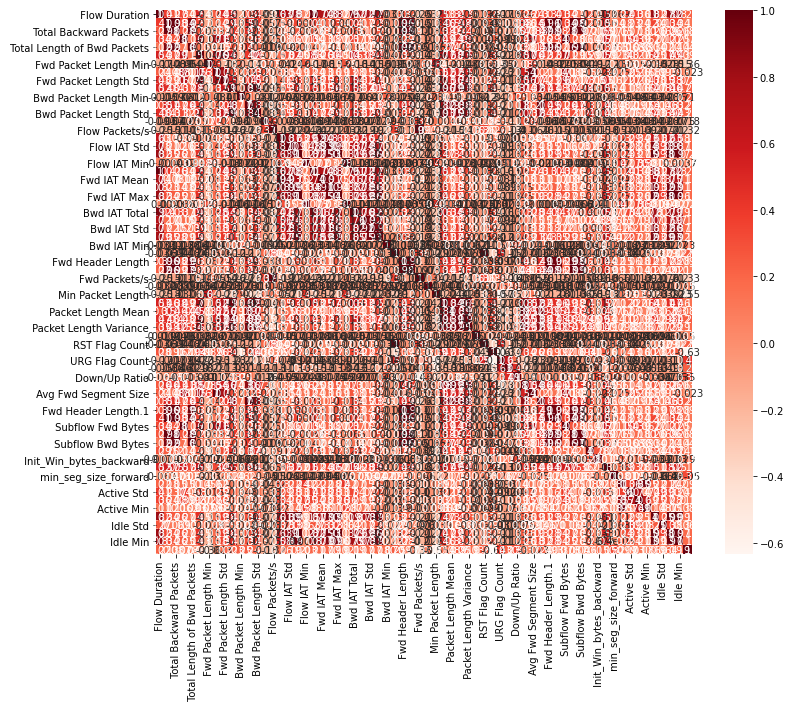

In [8]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
cor_target = abs(cor["Label"])
cor_target

 Flow Duration                  0.216396
 Total Fwd Packets              0.125621
 Total Backward Packets         0.087453
Total Length of Fwd Packets     0.078006
 Total Length of Bwd Packets    0.046229
                                  ...   
Idle Mean                       0.190474
 Idle Std                       0.064456
 Idle Max                       0.190302
 Idle Min                       0.186922
Label                           1.000000
Name: Label, Length: 66, dtype: float64

In [10]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

 Flow Duration             0.216396
 Fwd Packet Length Min     0.356366
 Fwd Packet Length Std     0.202237
Bwd Packet Length Max      0.225830
 Bwd Packet Length Min     0.251226
 Bwd Packet Length Mean    0.236531
 Bwd Packet Length Std     0.207269
 Flow Packets/s            0.319811
Fwd IAT Total              0.211919
Fwd PSH Flags              0.247509
Fwd Packets/s              0.331335
 Min Packet Length         0.552853
 Packet Length Std         0.252402
 RST Flag Count            0.247509
 ACK Flag Count            0.633550
 URG Flag Count            0.426475
 CWE Flag Count            0.229147
 Down/Up Ratio             0.333001
 Avg Bwd Segment Size      0.236531
 min_seg_size_forward      0.324847
Label                      1.000000
Name: Label, dtype: float64